<a href="https://colab.research.google.com/github/ShinHyun-soo/DLstudy/blob/main/CIFAR_10_ipypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, RMSprop, Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

170498071/170498071 [==============================] - 14s 0us/step


In [2]:
def create_model(input_shape):
  inputs = Input(shape=input_shape)
  
  conv_1_1 = Conv2D(32, (3, 3), padding='same',
                    activation='relu')(inputs)
  conv_1_2 = Conv2D(32, (3, 3), activation='relu')(conv_1_1)
  pool_1_2 = MaxPooling2D(pool_size=(2, 2))(conv_1_2)
  drop_1_2 = Dropout(0.25)(pool_1_2)
  conv_2_1 = Conv2D(64, (3, 3), padding='same',
                    activation='relu')(drop_1_2)
  conv_2_2 = Conv2D(64, (3,3), activation='relu')(conv_2_1)
  pool_2_2 = MaxPooling2D(pool_size=(2, 2))(conv_2_2)
  drop_2_2 = Dropout(0.25)(pool_2_2)

  flat_3_1 = Flatten()(drop_2_2)
  fcon_3_1 = Dense(512, activation='relu')(flat_3_1)
  drop_3_1 = Dropout(0.5)(fcon_3_1)
  outputs = Dense(10, activation='softmax')(drop_3_1)
  model = Model(inputs=inputs, outputs=outputs)

  return model

In [3]:
models = []
for i in range(5):
  model = create_model(x_train.shape[1:])
  models.append(model)

sgd = SGD(lr=0.001)
momentum = SGD(lr=0.001, momentum=0.05)
adagrad = Adagrad(lr=0.001)
rmsprop = RMSprop(lr=0.001)
adam = Adam(lr=0.001)

optimizers = [sgd, momentum, adagrad, rmsprop, adam]
histories = []
for model, opt in zip(models, optimizers):
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                      batch_size=256,
                      epochs=20,
                      validation_data=(x_test, y_test),
                      shuffle=True)
  histories.append(history)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
196/196 [==============================] - 13s 26ms/step - loss: 2.3092 - accuracy: 0.0989 - val_loss: 2.2996 - val_accuracy: 0.1002
Epoch 2/20
196/196 [==============================] - 4s 23ms/step - loss: 2.3035 - accuracy: 0.1027 - val_loss: 2.2978 - val_accuracy: 0.1002
Epoch 3/20
196/196 [==============================] - 4s 22ms/step - loss: 2.3007 - accuracy: 0.1060 - val_loss: 2.2963 - val_accuracy: 0.1010
Epoch 4/20
196/196 [==============================] - 4s 22ms/step - loss: 2.2978 - accuracy: 0.1096 - val_loss: 2.2947 - val_accuracy: 0.1029
Epoch 5/20
196/196 [==============================] - 5s 23ms/step - loss: 2.2966 - accuracy: 0.1107 - val_loss: 2.2931 - val_accuracy: 0.1059
Epoch 6/20
196/196 [==============================] - 4s 22ms/step - loss: 2.2938 - accuracy: 0.1162 - val_loss: 2.2912 - val_accuracy: 0.1098
Epoch 7/20
196/196 [==============================] - 4s 22ms/step - loss: 2.2921 - accuracy: 0.1172 - val_loss: 2.2890 - val_accuracy: 0.113

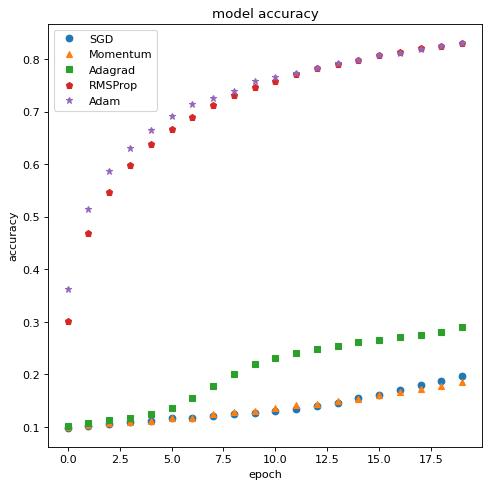

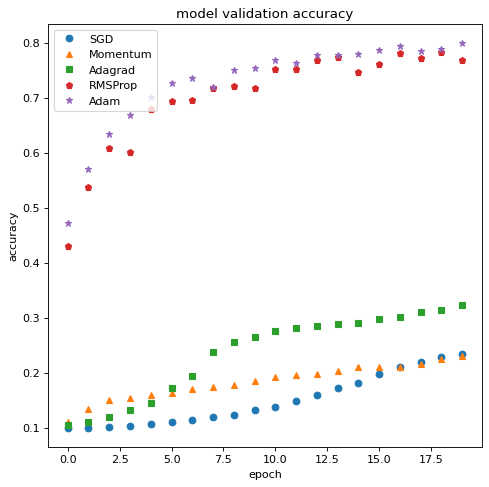

In [5]:
plt.figure(figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(histories[0].history['accuracy'], 'o')
plt.plot(histories[1].history['accuracy'], '^')
plt.plot(histories[2].history['accuracy'], 's')
plt.plot(histories[3].history['accuracy'], 'p')
plt.plot(histories[4].history['accuracy'], '*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD', 'Momentum', 'Adagrad', 'RMSProp', 'Adam'], loc='upper left')
plt.show()

plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(histories[0].history['val_accuracy'], 'o')
plt.plot(histories[1].history['val_accuracy'], '^')
plt.plot(histories[2].history['val_accuracy'], 's')
plt.plot(histories[3].history['val_accuracy'], 'p')
plt.plot(histories[4].history['val_accuracy'], '*')
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD', 'Momentum', 'Adagrad', 'RMSProp', 'Adam'], loc='upper left')
plt.show()

